# Exercise 1: Tabular data

In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score



## Load the dataset

In [55]:
df = pd.read_csv("weatherHistory_bis.csv")
df

,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Temperature (C)
0,0.89,14.1197,251.0,15.8263,1015.13,9.472222
1,0.86,14.2646,259.0,15.8263,1015.63,9.355556
2,0.89,3.9284,204.0,14.9569,1015.94,9.377778
3,0.83,14.1036,269.0,15.8263,1016.41,8.288889
4,0.83,11.0446,259.0,15.8263,1016.51,8.755556
...,...,...,...,...,...,...
96448,0.43,10.9963,31.0,16.1000,1014.36,26.016667
96449,0.48,10.0947,20.0,15.5526,1015.16,24.583333
96450,0.56,8.9838,30.0,16.1000,1015.66,22.038889
96451,0.60,10.5294,20.0,16.1000,1015.95,21.522222


##  Visualize the Data: Use Seaborn to visualize the relationship between the features and the target variable (Temperature C).

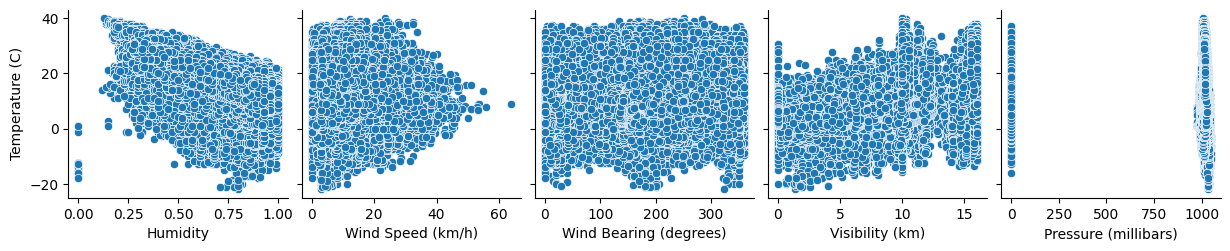

In [26]:
sns.pairplot(df, x_vars=["Humidity", "Wind Speed (km/h)", "Wind Bearing (degrees)", "Visibility (km)", "Pressure (millibars)"], y_vars=["Temperature (C)"])
plt.show()

## Normalize the Data and split data into train and test sets

In [65]:
scaler = MinMaxScaler()
df_norm = scaler.fit_transform(df)
X = df_norm[:, :-1]  # Features (all columns except the last three)
y = df_norm[:, -1]   # Temperature C (third column from the end)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Create a Keras model to predict the Temperature

In [66]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [67]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
1930/1930 [==============================] - 6s 3ms/step - loss: 0.0145 - val_loss: 0.0126
Epoch 2/50
1930/1930 [==============================] - 4s 2ms/step - loss: 0.0124 - val_loss: 0.0120
Epoch 3/50
1930/1930 [==============================] - 4s 2ms/step - loss: 0.0121 - val_loss: 0.0115
Epoch 4/50
1930/1930 [==============================] - 6s 3ms/step - loss: 0.0119 - val_loss: 0.0116
Epoch 5/50
1930/1930 [==============================] - 4s 2ms/step - loss: 0.0118 - val_loss: 0.0121
Epoch 6/50
1930/1930 [==============================] - 4s 2ms/step - loss: 0.0117 - val_loss: 0.0119
Epoch 7/50
1930/1930 [==============================] - 5s 3ms/step - loss: 0.0116 - val_loss: 0.0122
Epoch 8/50
1930/1930 [==============================] - 4s 2ms/step - loss: 0.0115 - val_loss: 0.0114
Epoch 9/50
1930/1930 [==============================] - 4s 2ms/step - loss: 0.0115 - val_loss: 0.0112
Epoch 10/50
1930/1930 [==============================] - 5s 3ms/step - loss: 0.011

##  Visualize Loss and Validation Loss

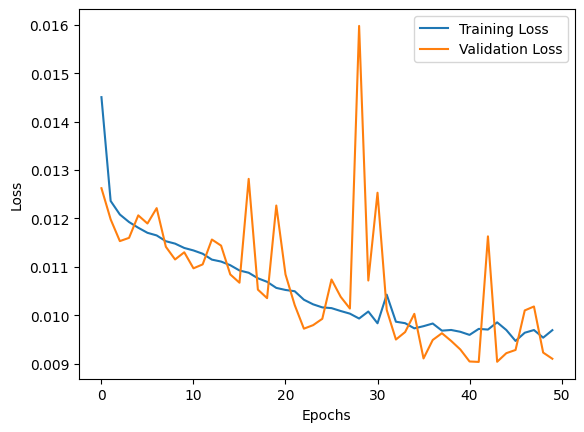

In [68]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Evaluate the Model on Test Data using mse (loss) and r2 (determination coefficient) and Visualize the difference between Temperature predictions and right tenmperatures on the test dataset



In [69]:
loss = model.evaluate(X_test, y_test)
print(f"Loss on test data: {loss}")

603/603 [==============================] - 1s 2ms/step - loss: 0.0093
Loss on test data: 0.009310530498623848


In [70]:
# Évaluez le modèle sur les données de test et obtenez les prédictions
y_pred = model.predict(X_test)

# Calcul du coefficient de détermination (R²)
r2 = r2_score(y_test, y_pred)
print(f"R² on test data: {r2}")

603/603 [==============================] - 1s 1ms/step
R² on test data: 0.6150566062813565


603/603 [==============================] - 1s 2ms/step


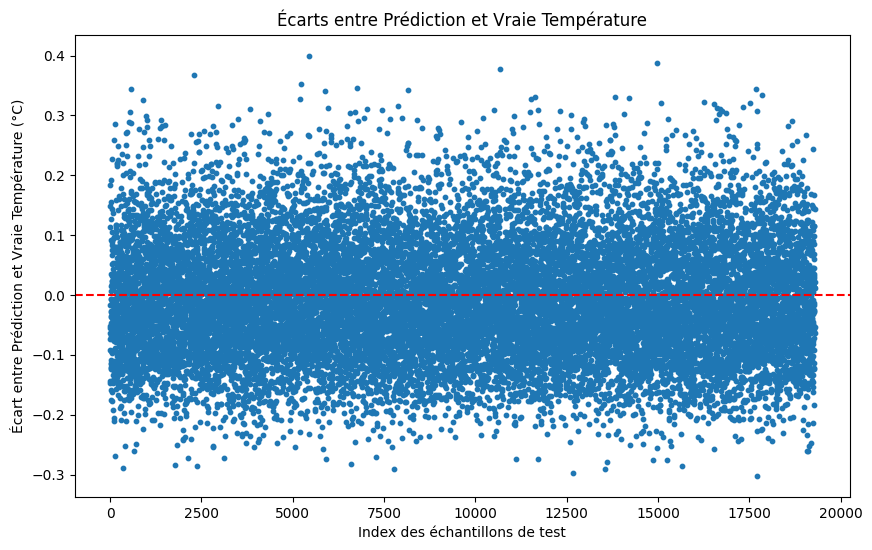

In [71]:
y_pred = model.predict(X_test)

errors = y_pred.flatten() - y_test

plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(errors)), errors, marker='o', s=10)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Index des échantillons de test')
plt.ylabel('Écart entre Prédiction et Vraie Température (°C)')
plt.title('Écarts entre Prédiction et Vraie Température')
plt.show()

## Create a Prediction Function

In [92]:
def predict_temperature(features):
    features_normalized = scaler.transform([features])
    prediction = model.predict(np.expand_dims(features_normalized[0][:5], axis=0))
    return prediction[0][0]*(scaler.data_max_[-1] - scaler.data_min_[-1])+scaler.data_min_[-1]

sample_features = [0.85, 12.345, 200.0, 10.0, 1015.0, 0.0]
predicted_temperature = predict_temperature(sample_features)
print(f"Predicted temperature: {predicted_temperature} °C")

1/1 [==============================] - 0s 29ms/step
Predicted temperature: 6.370820280909538 °C


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


# Exercice 2: Movie review classification

In [93]:
import tensorflow as tf
import tensorflow_datasets as tfds # to use tensorflow prebuilt datasets
import tensorflow_hub as hub # Contains presaved models for transfer learning

## Load imdb_reviews dataset with tds

In [94]:
# Existing dataset
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bucc',
 'c4',
 'c4_wsrs',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar100_n',
 'cifar10_1',
 'cifar10_corrupted',
 'cifar10_n',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'conll2002',
 'conll2003',
 'controlled_noisy_web_labels'

In [95]:
train_data, validation_data, test_data = tfds.load(name="imdb_reviews",split=('train[:60%]', 'train[60%:]', 'test'), as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteHMRYC9/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteHMRYC9/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteHMRYC9/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [96]:
# Since our result dataset are not of type list or dictionary we will get data as below
train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))
print('train_examples_batch= %s' % (train_examples_batch))
print('train_labels_batch= %s' % (train_labels_batch))

train_examples_batch= tf.Tensor(
[b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
 b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film wa

## Load the model: https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1 with tensorflow_hub

In [99]:
pretrained_model = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(pretrained_model, input_shape=[], dtype=tf.string, trainable=True)
# hub_layer is or input layer which converts text inti vectors

In [97]:
# Example of vectorize
train_examples_batch[:1]

<tf.Tensor: shape=(1,), dtype=string, numpy=
array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."],
      dtype=object)>

In [105]:
train_examples_batch[:1].shape

TensorShape([1])

In [100]:
hub_layer(train_examples_batch[:1])

<tf.Tensor: shape=(1, 20), dtype=float32, numpy=
array([[ 1.765786  , -3.882232  ,  3.9134233 , -1.5557289 , -3.3362343 ,
        -1.7357955 , -1.9954445 ,  1.2989551 ,  5.081598  , -1.1041286 ,
        -2.0503852 , -0.72675157, -0.65675956,  0.24436149, -3.7208383 ,
         2.0954835 ,  2.2969332 , -2.0689783 , -2.9489717 , -1.1315987 ]],
      dtype=float32)>

## Create your own model with the pretrained model

In [101]:
model = tf.keras.Sequential()

model.add(hub_layer) # input layer
model.add(tf.keras.layers.Dense(16, activation = 'relu')) # 16 neurons in hidden layer
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid')) # Since single callss classification using sigmoid function. Use 'softmax' for multclass classification
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 20)                400020    
                                                                 
 dense_12 (Dense)            (None, 16)                336       
                                                                 
 dense_13 (Dense)            (None, 1)                 17        
                                                                 
Total params: 400373 (1.53 MB)
Trainable params: 400373 (1.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Train the model

In [102]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [103]:
## Shuffle the samples, total 20 iterations, pass validation data for fine tuning, verbose =1 for printing the output
model.fit(train_data.shuffle(10000).batch(512),
          epochs=20,
          validation_data = validation_data.batch(512),
          verbose =1)

Epoch 1/20
30/30 [==============================] - 5s 131ms/step - loss: 0.7489 - accuracy: 0.5523 - val_loss: 0.6509 - val_accuracy: 0.6180
Epoch 2/20
30/30 [==============================] - 3s 87ms/step - loss: 0.6095 - accuracy: 0.6739 - val_loss: 0.5798 - val_accuracy: 0.7040
Epoch 3/20
30/30 [==============================] - 3s 88ms/step - loss: 0.5557 - accuracy: 0.7317 - val_loss: 0.5395 - val_accuracy: 0.7443
Epoch 4/20
30/30 [==============================] - 4s 116ms/step - loss: 0.5121 - accuracy: 0.7675 - val_loss: 0.5032 - val_accuracy: 0.7749
Epoch 5/20
30/30 [==============================] - 3s 88ms/step - loss: 0.4690 - accuracy: 0.7979 - val_loss: 0.4650 - val_accuracy: 0.7969
Epoch 6/20
30/30 [==============================] - 3s 89ms/step - loss: 0.4275 - accuracy: 0.8215 - val_loss: 0.4312 - val_accuracy: 0.8158
Epoch 7/20
30/30 [==============================] - 3s 87ms/step - loss: 0.3881 - accuracy: 0.8446 - val_loss: 0.4025 - val_accuracy: 0.8313
Epoch 8/20


## Prediction

In [111]:
# Evaluate the model in the test
model.evaluate(test_data.batch(512))

49/49 [==============================] - 17s 353ms/step - loss: 0.3174 - accuracy: 0.8672


[0.31742772459983826, 0.8671600222587585]

In [109]:
model.predict(['This the worst movie i have even seen'])

1/1 [==============================] - 0s 47ms/step


array([[0.06710006]], dtype=float32)

In [104]:
# We can also predict for multiple review's at a time
model.predict(["This is the worst movie I have ever seen",
              "An excellent movie that I enjoyed a lot",
              "how can one make such a horrible movie? there is no story, acting direction everything is very poor"])

1/1 [==============================] - 0s 94ms/step


array([[0.1040298 ],
       [0.9905932 ],
       [0.01012835]], dtype=float32)

In [112]:
test_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>